# ***Internship Project ***

 **Objective**
The objective of the project is to do data pre-processing and exploratory data analysis
of the dataset


*   Name : Shreyas Mohan Kale







# **Step 1**: Importing the dataset and the necessary libraries, checking datatype, statistical summary, shape, null values etc.




*   This is done just to get a brief summary of what our dataset is and what it comprises.
*   Also datatype should be checked beacuse if target variable is object then will face problems in the upcoming steps.



In [202]:
#Importing libraries (These are not the all but other libraries will be imported when needed)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing the car dataset
df= pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [203]:
#checking shape
df.shape

(11914, 16)

In [204]:
#Checking datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [205]:
#Checking the numerical features
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [206]:
#Checking which features have null values
df.isnull().any()

Make                 False
Model                False
Year                 False
Engine Fuel Type      True
Engine HP             True
Engine Cylinders      True
Transmission Type    False
Driven_Wheels        False
Number of Doors       True
Market Category       True
Vehicle Size         False
Vehicle Style        False
highway MPG          False
city mpg             False
Popularity           False
MSRP                 False
dtype: bool

Features with True in the above output have null values.

# **Step 2**: Dropping the columns of less revelance.

*   Dropping unnecessary columns is a good practice , as they dont much contribute to the prediction value.
*   Moreover more no. of columns will result in more no. of variables to deal with and the model will become slow and sometimes less effective too.



In [207]:
#The feature 'Market Category' has many null values hence it will not be considered in prediction.
#Showing no. of null values of Market Category
df['Market Category'].isnull().sum()

3742

In [208]:
#Droping the 'Market Category' column 
df.drop(['Market Category'], axis=1, inplace=True)

#Checking if it is dropped or not
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

*   Droping the columns 'Transmission Type','Driven_Wheels' because as you can see they are not the features on which car price is that dependent.
*   While manufacturing a car, the cost difference among these features in themselves is very low.
*   While manufacturing a car, the cost difference among these features in themselves is very low.
*   Whatever the Transsion type the cost of manufacturaing that particular part will be almost same.
And sam applies for Driven Wheels





In [209]:
#Dropping 'Transmission Type' and 'Driven Wheels'
df.drop(['Transmission Type','Driven_Wheels'], axis=1, inplace=True)

# **Step 3**:Renaming the columns  

It is done just for readability .

In [210]:
#Renaming the columns
df=df.rename(columns={ 'Engine HP': 'HP', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode','highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'})
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'HP', 'Engine Cylinders',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'MPG-H', 'MPG-C',
       'Popularity', 'Price'],
      dtype='object')

# **Step 4**:Checking for any duplicates and removing them. Also checking for null values and filling them.






*   Although this an EDA project, still the null/missing values should be filled as it increases the data available and in turn helps our model to be slightly more effective
*   As you can see below the null values are very less and hence it doesnt matter enough but still we'll fill them.  

*   It doesn't affect the performance is same data is given for training the data and also more time is consumed because the lenght of dataset.
*   Hence, we drop the duplicate rows.





In [211]:
#Checking the null values 
df.isnull().any()

Make                False
Model               False
Year                False
Engine Fuel Type     True
HP                   True
Engine Cylinders     True
Number of Doors      True
Vehicle Size        False
Vehicle Style       False
MPG-H               False
MPG-C               False
Popularity          False
Price               False
dtype: bool

In [212]:
#Filling the null numerical values
df['HP'].fillna(value=df['HP'].mean(), inplace=True)
df['Engine Cylinders'].fillna(value=df['Engine Cylinders'].mean(), inplace=True)
df['Number of Doors'].fillna(value=df['Number of Doors'].mean(), inplace=True)

In [213]:
#Checking discription of features to decide which ones are not needed
df.describe()

,Year,HP,Engine Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.386070,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.875192,1.778316,0.881093,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


The features 'Engine Cylinders', 'No. of doors' has very low Standard Deviation and hence there is no much range of values for them . That means they do not affect the MSRP majorly. 


In [214]:
#Dropping the less significant features
df.drop(['Engine Cylinders','Number of Doors','Engine Fuel Type'], axis=1, inplace=True)
df.head()

,Make,Model,Year,HP,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,Compact,Convertible,28,18,3916,34500


In [215]:
df.shape

(11914, 10)

In [216]:
#Finding duplicate values
duplicate_rows_df=df[df.duplicated()]

In [217]:
#Dropping the duplicate rows
df=df.drop_duplicates()
df.shape

(11092, 10)

As ypu can see the no. of rows has decreased .This shows that the duplicate rows has been dropped.

# **Step 5**:Checking outliers by plotting graphs and removing those data points from the dataset.



*   Outliers are extreme values that deviate from other observations on data
*   They have either very high or very low values.

*   Hence the the main reason of less effective model.
*   So, it is advised to remove the outliers from our dataset.


*   They can be visualized using boxplot. 
*   Values outside the box are outliers.

They can be removed by IQR(Inter-Quartile Range) method.







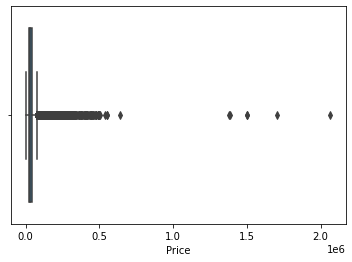

In [218]:
#Detecting outliers for Price. 
sns.boxplot(x=df['Price'])

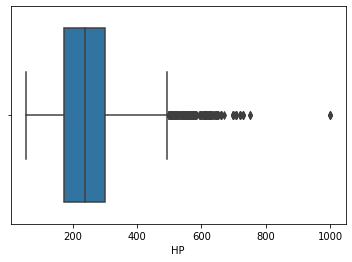

In [219]:
#Detecting outliers for HP.
sns.boxplot(x=df['HP'])

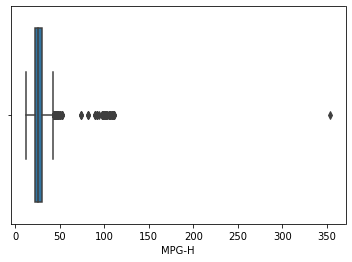

In [220]:
#Detecting outliers for MPG-H.
sns.boxplot(x=df['MPG-H'])

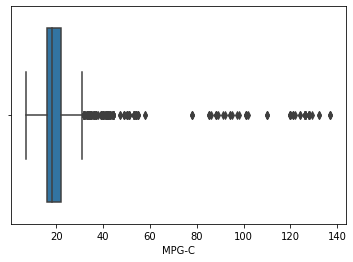

In [221]:
#Detecting outliers for MPG-C.
sns.boxplot(x=df['MPG-C'])

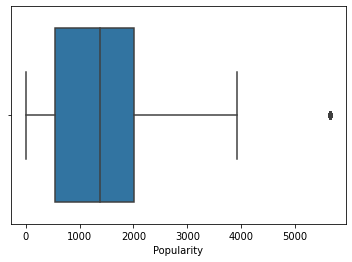

In [222]:
#Detecting outliers for Popularity.
sns.boxplot(x=df['Popularity'])

In [223]:
#Finding the IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              130.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21393.75
dtype: float64


In [224]:
#Removing the outliers
df = df[~((df < (Q1-2.5 * IQR)) |(df > (Q3+2.5 * IQR))).any(axis=1)]


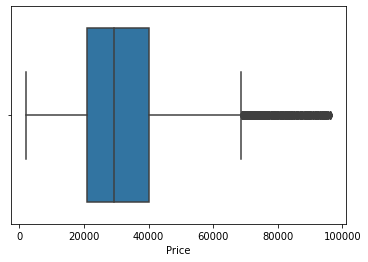

In [225]:
#Again ploting boxplot for all features to visualize that outliers has been removed.
sns.boxplot(x=df['Price'])

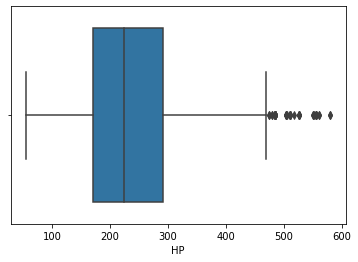

In [226]:
sns.boxplot(x=df['HP'])

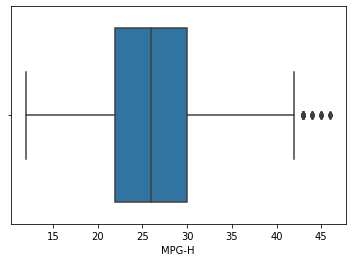

In [227]:
sns.boxplot(x=df['MPG-H'])

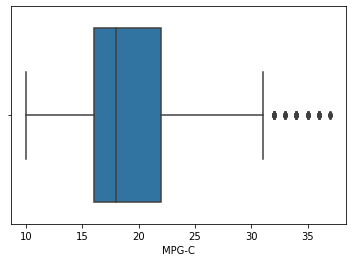

In [228]:
sns.boxplot(x=df['MPG-C'])

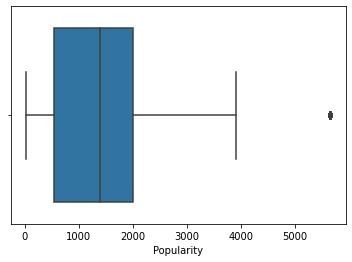

In [229]:
sns.boxplot(x=df['Popularity'])

# **Step 6**:Finding the most represented car brands in the dataset and finding the average price among the top 10 car brands.


In [230]:
#No. of occurences of each brand car 
df['Make'].value_counts()

Chevrolet        1051
Ford              794
Toyota            589
Volkswagen        551
Nissan            532
Dodge             507
GMC               482
Mazda             410
Honda             405
Cadillac          389
Suzuki            332
Infiniti          328
Audi              284
BMW               280
Volvo             266
Hyundai           255
Mercedes-Benz     252
Acura             243
Subaru            238
Kia               222
Mitsubishi        204
Lexus             192
Buick             190
Chrysler          187
Pontiac           179
Lincoln           151
Oldsmobile        131
Saab              109
Land Rover        107
Plymouth           71
Porsche            66
Scion              60
FIAT               59
Lotus              28
Maserati           22
HUMMER             17
Alfa Romeo          5
Genesis             3
Name: Make, dtype: int64

The car brands that are the most represented in the dataset are = ['Chevrolet','Ford','Toyota','Volkswagen','Nissan','Dodge','GMC','Mazda','Honda','Cadillac']

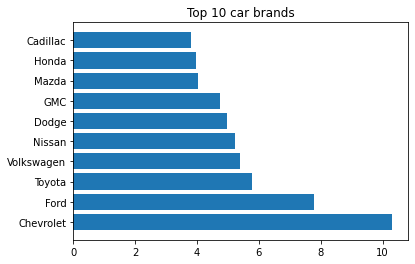

In [231]:
#Determining the top car brands
popular=df['Make'].value_counts()*100/sum(df['Make'].value_counts())
popular_brands=popular.index[:10]

#Visualising
plt.barh(popular_brands,  width=popular[:10])
plt.title('Top 10 car brands')
plt.show()

In [232]:
#average of price for the top 10 car brand 
df[['Make','Price']].loc[(df['Make']=='Chevrolet')|(df['Make']=='Ford')|(df['Make']=='Toyota')|(df['Make']=='Volkswagen')|(df['Make']=='Nissan')|(df['Make']=='Dodge')|(df['Make']=='GMC')|(df['Make']=='Mazda')|(df['Make']=='Honda')|(df['Make']=='Cadillac')].groupby('Make').Price.mean()

Make
Cadillac      55662.089974
Chevrolet     28097.471931
Dodge         22183.928994
Ford          28044.942065
GMC           32444.085062
Honda         26614.503704
Mazda         20506.460976
Nissan        27493.468045
Toyota        27583.076401
Volkswagen    28560.782214
Name: Price, dtype: float64

We can see that among the top 10 represented car brands :  

*   Cadillac has the highest average price.
*   Volkswagen has the lowest average price.



# **Step 7**: Ploting the correlation matrix.


In [233]:
#Correlation matrix
df.corr()

,Year,HP,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.384512,0.337638,0.292546,0.090744,0.621082
HP,0.384512,1.000000,-0.440570,-0.530671,0.102368,0.761853
MPG-H,0.337638,-0.440570,1.000000,0.932330,-0.076333,-0.106747
MPG-C,0.292546,-0.530671,0.932330,1.000000,-0.072252,-0.175362
Popularity,0.090744,0.102368,-0.076333,-0.072252,1.000000,0.045951
Price,0.621082,0.761853,-0.106747,-0.175362,0.045951,1.000000


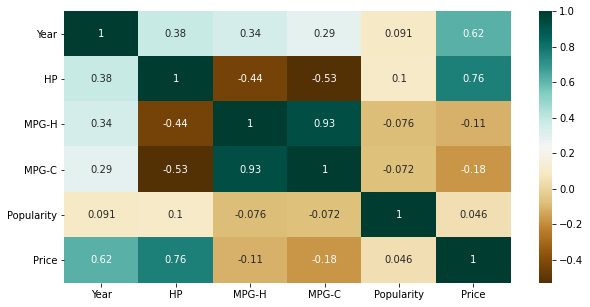

In [234]:
#Plotting the correlation matrix using heatmap(Less precise values than just df.corr())
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

Correlation with 'Price':

*   Year : 0.62  (Positive corelation)
*   HP : 0.72 (Positive corelation)
*   MPG-H : -0.11 (Negative corelation)
*   MPG-C : -0.18 (Negative corelation)
*   Popularity : 0.046 (Positive corelation)

---

Conclusion :
1.   HP has the hightest correlation with Price. Hence it will affect Price the most.
2.   Popularity has the lowest correlation with Price. Hence its effect on Price prediction will be less but still it cannot be ignored.

*   MPG-H and MPG-C has negavtive correlation that means there one's change will be compliment to other's change.

*   MPG-H and MPG-C has strong correlation among them as well.












# **Step 8**:Performing EDA and ploting different graphs.

## **Scatter plots**
Scatter plot is used to visualize correlation between two variables.

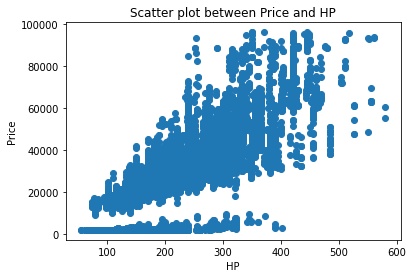

In [235]:
#Relational scatter plot between Price and HP
plt.scatter(df['HP'], df['Price'])
plt.title('Scatter plot between Price and HP')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

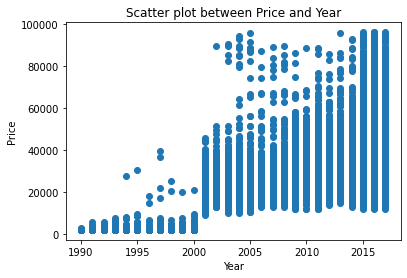

In [236]:
#Relational scatter plot between Price and Year
plt.scatter(df['Year'], df['Price'])
plt.title('Scatter plot between Price and Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

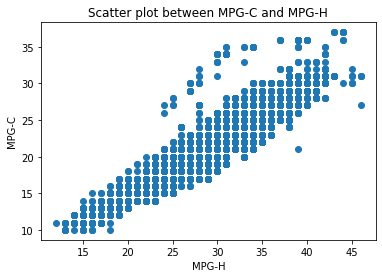

In [237]:
#Realtional scatter plot between MPG-C and MPG-H
plt.scatter(df['MPG-H'], df['MPG-C'])
plt.title('Scatter plot between MPG-C and MPG-H')
plt.xlabel('MPG-H')
plt.ylabel('MPG-C')
plt.show()

As you can see from above scatter plots,[ (Price and HP) ; (Price and Year) ; (MPG-H and MPG-C) ] has linear trend.

## **Bar graphs and Histograms**

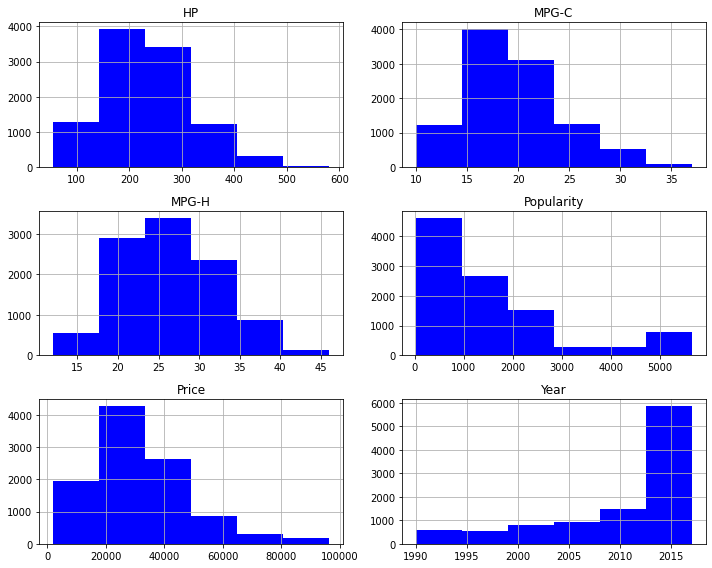

In [238]:
df[['Year','MPG-H','MPG-C','HP','Popularity','Price']].hist(figsize=(10,8),bins=6,color='B')
plt.tight_layout()
plt.show()

**Findings** :

*   Most cars has horsepower 150 to 225.
*   Most cars has MPG-C values between 14-18.
*   Most cars has MPG-H values between 23-29.
*   Most cars are in the price range 19000 to 34000.
*   There has been sudden rise in car selling in the years 2013-17.
   





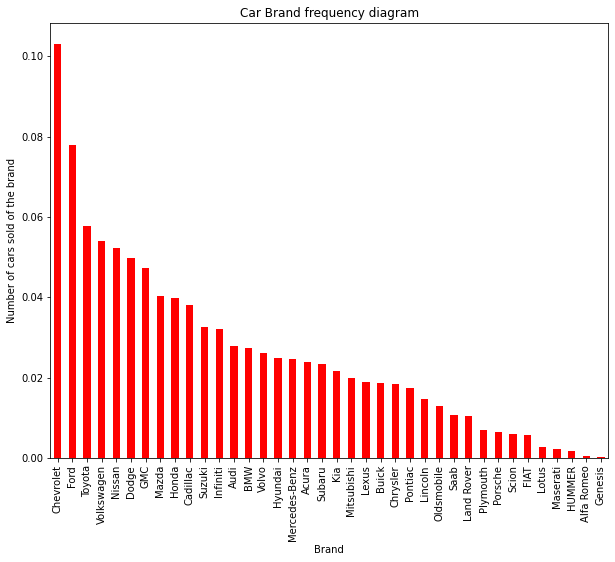

In [239]:
df['Make'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red')
plt.title("Car Brand frequency diagram")
plt.ylabel('Number of cars sold of the brand')
plt.xlabel('Brand')
plt.show()

**Findings** :

*   Chevrolet sold the most cars.
*   Genesis sold the leat cars.



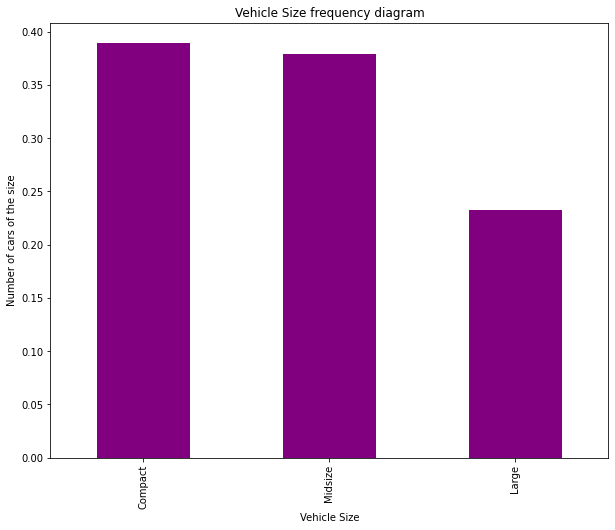

In [240]:
df['Vehicle Size'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Vehicle Size frequency diagram")
plt.ylabel('Number of cars of the size')
plt.xlabel('Vehicle Size')
plt.show()

**Finding** :

*   Compact and Midsize cars are more often sold than the cars having Large size.



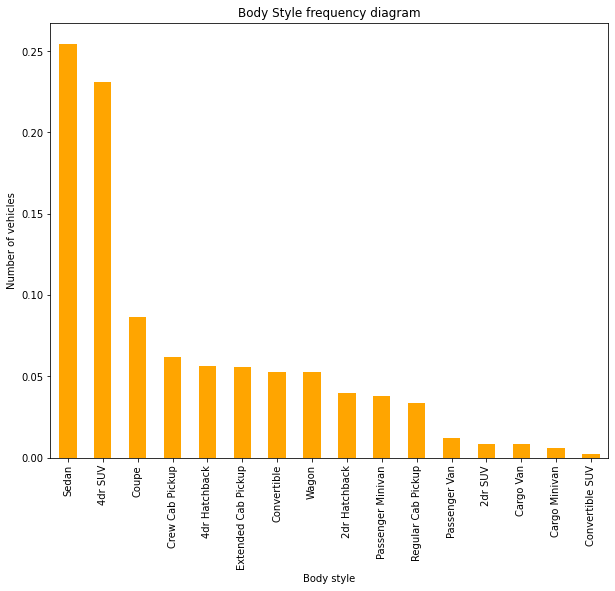

In [241]:
df['Vehicle Style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Body Style frequency diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Body style');

**If compared by Vehicle Style** : 

*   Sedan cars are the most sold cars.
*   Convertible SUV are the least sold cars.



# **Step 9**:Spliting the dataset into 80 and 20 ratio and building a machine learning model with Price as the target variable

Preprocessiong:

*   The categorical data has to be changed to numeric value for the model to understand it .
*   We have done it with a function called LabelEncoder.


*   The data is also very diversified and scattered , so we need to scale it to a certain extent so that we dont miss any detail.
*   We have done it with StandardScaler.


---


We have to split the data so that we can measure the effectivness / accuracy of the model.




In [242]:
#Dividing our dataset in two parts: x=DATA , y= TARGET VARIABLE
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [243]:
print(x)
print(y)

          Make       Model  Year  ...  MPG-H MPG-C Popularity
0          BMW  1 Series M  2011  ...     26    19       3916
1          BMW    1 Series  2011  ...     28    19       3916
2          BMW    1 Series  2011  ...     28    20       3916
3          BMW    1 Series  2011  ...     28    18       3916
4          BMW    1 Series  2011  ...     28    18       3916
...        ...         ...   ...  ...    ...   ...        ...
11909    Acura         ZDX  2012  ...     23    16        204
11910    Acura         ZDX  2012  ...     23    16        204
11911    Acura         ZDX  2012  ...     23    16        204
11912    Acura         ZDX  2013  ...     23    16        204
11913  Lincoln      Zephyr  2006  ...     26    17         61

[10191 rows x 9 columns]
0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: Price, Length: 10191, dtype: int64


In [244]:
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#x[:, 0] = labelencoder.fit_transform(x[:, 0])

#I tried to do Label encoding using the above simple code but it gave me error so I learned a new method of encoding as follows.

In [245]:
#Encoding the categorical data.
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

In [246]:
def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [247]:
x=MultiColumnLabelEncoder(columns = ['Make','Model','Vehicle Size','Vehicle Style']).transform(x)

In [248]:
#Displaying the result of our encoding
x

,Make,Model,Year,HP,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity
0,3,1,2011,335.0,0,8,26,19,3916
1,3,0,2011,300.0,0,6,28,19,3916
2,3,0,2011,300.0,0,8,28,20,3916
3,3,0,2011,230.0,0,8,28,18,3916
4,3,0,2011,230.0,0,6,28,18,3916
...,...,...,...,...,...,...,...,...,...
11909,0,776,2012,300.0,2,2,23,16,204
11910,0,776,2012,300.0,2,2,23,16,204
11911,0,776,2012,300.0,2,2,23,16,204
11912,0,776,2013,300.0,2,2,23,16,204


As you can see ,the categorical values have been converted to numeric encoded values.

In [249]:
#Scaling the dataset
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)

In [250]:
#Splitting the dataset in 80:20(Training set : Test set) ratio.

from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# **Step 10**:Trying different algorithms and checking their performance over metrics like R square, RMSE, MAE etc.

Below are the various models for predicting the target variable 'Price'. 

*   A scatter plot is given for every model to visualize the closeness of prediction of the y_test value v/s y_test.
*   A distplot is also given just for conforming the assumption we made about Normal Distribution. 


*   R-square, RME,MAE values are calculated for every model to check the effectiveness the model.






# **Linear Regression Model**

In [251]:
#Fitting the MLR to the Training set
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
#Predicting the test set results
y_test_pred=linear_model.predict(x_test)

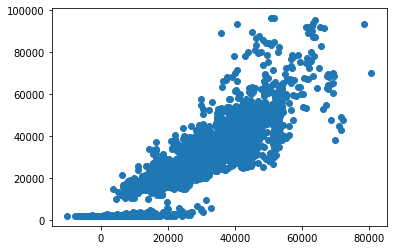

In [253]:
plt.scatter(y_test_pred,y_test)

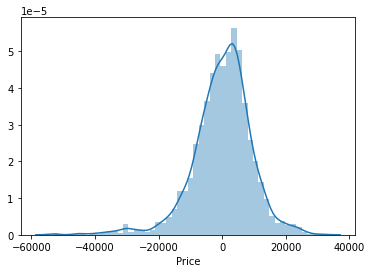

In [254]:
sns.distplot((y_test_pred-y_test), bins=50)

In [255]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
print('MAE',mae)
print('RMSE',rmse)
print('r2_score',r2)

MAE 6850.439753239125
RMSE 9349.770122152771
r2_score 0.7171351131285482


# **Decision Tree Model**

In [256]:
#Fitting the DecisionTree to the Training set
from sklearn.tree import DecisionTreeRegressor
decisiontree_model= DecisionTreeRegressor(max_depth=100)
decisiontree_model.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [257]:
#Predicting the test set results
y_test_pred=decisiontree_model.predict(x_test)

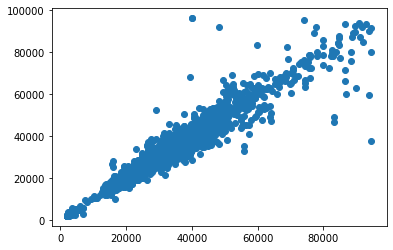

In [258]:
plt.scatter(y_test_pred,y_test)

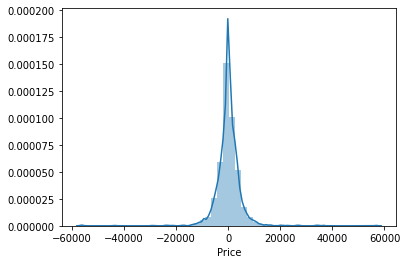

In [259]:
sns.distplot((y_test_pred-y_test), bins=50)

In [260]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
print('MAE',mae)
print('RMSE',rmse)
print('r2_score',r2)

MAE 2743.9276968168338
RMSE 4791.3709767365735
r2_score 0.925715745479686


# **Random Forest Model**

In [261]:
#Fitting the RandomForest to the Training set
from sklearn.ensemble import RandomForestRegressor
randomforest_model=RandomForestRegressor()
randomforest_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [262]:
#Predicting the test set results
y_test_pred=randomforest_model.predict(x_test)

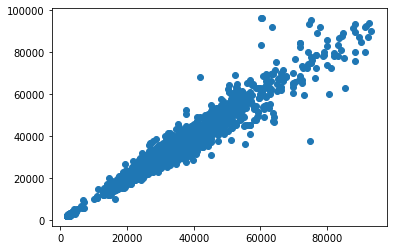

In [263]:
plt.scatter(y_test_pred,y_test)

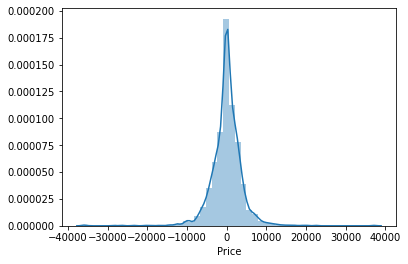

In [264]:
sns.distplot((y_test_pred-y_test), bins=50)

In [265]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
print('MAE',mae)
print('RMSE',rmse)
print('r2_score',r2)

MAE 2513.1547407849835
RMSE 3948.170283323732
r2_score 0.9495607146747783


# **XGBoost Ensemble Method**

In [266]:
#Fitting the XGBoost to the Training set
import xgboost as xgb
model_xgb=xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)

[10:28:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [267]:
#Predicting the test set results
y_test_pred=model_xgb.predict(x_test)

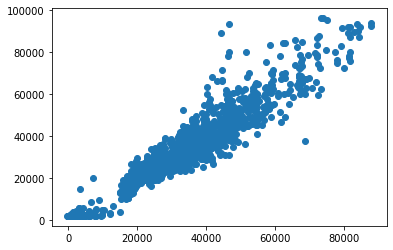

In [268]:
plt.scatter(y_test_pred,y_test)

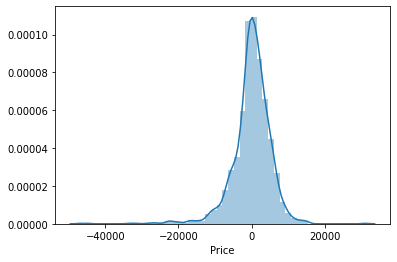

In [269]:
sns.distplot((y_test_pred-y_test), bins=50)

In [270]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
print('MAE',mae)
print('RMSE',rmse)
print('r2_score',r2)

MAE 3607.0327169260245
RMSE 5280.9143062429475
r2_score 0.9097607630979088


# **AdaBoost Algorithm**

In [271]:
#Fitting the AdaBoost to the Training set
from sklearn.ensemble import AdaBoostRegressor
Adaboost_model= AdaBoostRegressor()
Adaboost_model.fit(x_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [272]:
#Predicting the test set results
y_test_pred=Adaboost_model.predict(x_test)

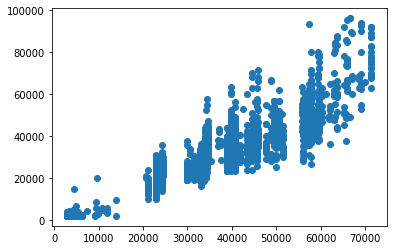

In [273]:
plt.scatter(y_test_pred,y_test)

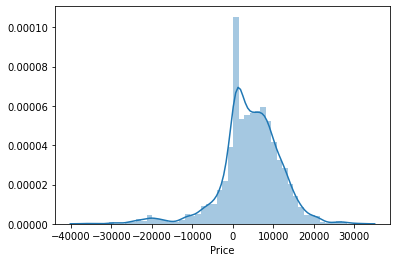

In [274]:
sns.distplot((y_test_pred-y_test), bins=50)

In [275]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae=mean_absolute_error(y_test,y_test_pred)
rmse=(np.sqrt(mean_squared_error(y_test,y_test_pred)))
r2=r2_score(y_test,y_test_pred)
print('MAE',mae)
print('RMSE',rmse)
print('r2_score',r2)

MAE 6680.676028108782
RMSE 8617.926200396816
r2_score 0.7596839843022203


# **Conclusion**

r2_score values :

*   MLR = 71.7 %
*   DecisionTree = 92.8 % 
*   RandomForest = 95 %
*   XGBoost = 90.97 %
*   AdaBoost = 74.5 %

R2_score of Random Forest is the largest.
And comparing MAE and RMSE of all the models, Random Forest has the terms with the lowest values. 


Random Forest algorithm gave the most desired output and hence is the best among these models for this car dataset.









